In [220]:
import pandas as pd

df1 = pd.read_csv('../output_1_10000.csv')
df2 = pd.read_csv('../output_10001_20000.csv')
df3 = pd.read_csv('../output_20001_30000.csv')
df4 = pd.read_csv('../output_30001_40000.csv')
df5 = pd.read_csv('../output_40001_50000.csv')
df6 = pd.read_csv('../output_50001_59542.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6])
df.head()

,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords
0,"tag:reuters.com,2019:newsml_A4N21U01K:1402935007.XML",2019-09-04T06:15:57.000Z,"tag:reuters.com,2019:newsml_A4N21U01K",TURKEY-CURRENCY/ (URGENT),"Turkey's lira firms on inflation data, Fed and ECB easing expectations","TURKEY-CURRENCY/ (URGENT):Turkey's lira firms on inflation data, Fed and ECB easing expectations",{'Market Reports'},"{'Europe', 'Turkey', 'Asia', 'South-Eastern Europe', 'Middle East', 'Emerging Market Countries', 'Asia / Pacific', 'South-West Asia'}",939,758,110
1,"tag:reuters.com,2019:newsml_A4N21U01U:1722667503.XML",2019-09-16T15:56:20.000Z,"tag:reuters.com,2019:newsml_A4N21U01U",SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT),"Turkey, Russia, Iran must take more responsibility for Syria peace -Erdogan","SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT):Turkey, Russia, Iran must take more responsibility for Syria peace -Erdogan",NaN,"{'United States', 'Americas', 'South-West Asia', 'North America', 'Europe', 'Iraq', 'South-Eastern Europe', 'Russia', 'Central / Eastern Europe', 'Asia', 'Iran', 'Middle East', 'North Asia', 'Turkey', 'CIS Countries', 'Gulf', 'Syria', 'Emerging Market Countries', 'Asia / Pacific'}",1052,868,126
2,"tag:reuters.com,2019:newsml_A4N21U01Y:1642687611.XML",2019-09-04T11:08:11.000Z,"tag:reuters.com,2019:newsml_A4N21U01Y",TURKEY-ECONOMY/BANKS (URGENT),Turkish banking sector NPL ratio rises to 4.47% at end-July -watchdog,TURKEY-ECONOMY/BANKS (URGENT):Turkish banking sector NPL ratio rises to 4.47% at end-July -watchdog,NaN,"{'Europe', 'Turkey', 'Asia', 'South-Eastern Europe', 'Middle East', 'Emerging Market Countries', 'Asia / Pacific', 'South-West Asia'}",880,711,111
3,"tag:reuters.com,2019:newsml_A4N21U01Z:346052338.XML",2019-09-12T14:59:13.000Z,"tag:reuters.com,2019:newsml_A4N21U01Z",TURKEY-ECONOMY/GDP (URGENT),Turkish economy will post positive annual growth in 2019 - Albayrak,TURKEY-ECONOMY/GDP (URGENT):Turkish economy will post positive annual growth in 2019 - Albayrak,{'Market Reports'},"{'Western Europe', 'Europe', 'Turkey', 'Asia', 'South-Eastern Europe', 'Middle East', 'Emerging Market Countries', 'Asia / Pacific', 'South-West Asia'}",920,754,108
4,"tag:reuters.com,2019:newsml_A4N21U020:1432378935.XML",2019-09-17T14:14:42.000Z,"tag:reuters.com,2019:newsml_A4N21U020",TURKEY-CURRENCY/OIL (URGENT),Turkey's lira firms after report of Saudi oil output normalising faster than anticipated,TURKEY-CURRENCY/OIL (URGENT):Turkey's lira firms after report of Saudi oil output normalising faster than anticipated,{'Market Reports'},"{'North America', 'Europe', 'Turkey', 'United States', 'Asia', 'Saudi Arabia', 'Gulf', 'Middle East', 'South-Eastern Europe', 'Emerging Market Countries', 'Asia / Pacific', 'Americas', 'South-West Asia'}",2313,1897,293


In [221]:
df.to_csv("reuters.csv.gz", 
           index=False, 
           compression="gzip")

In [222]:
df['avgWordLength'] = df['bodyLengthCharsNonWhitespace'] / df['bodyLengthWords']
df.describe()
# rough estimates about the text body:
#  - text body tends to be about 595 words long, but with extreme outliers (46297!)
#  - text body tends to be about 2904 chars long, but with extreme outliers (203K!)
#  - average word length is 7-8 chars long (bodyLengthCharsNonWhitespace / bodyLengthWords, for mean and max)

,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
count,59542.000000,59542.000000,59542.000000,59542.000000
mean,2759.126751,2201.525914,326.525864,7.591569
std,7472.396196,6149.590782,960.275222,1.380466
min,0.000000,0.000000,1.000000,0.000000
25%,482.000000,380.000000,44.000000,6.644231
50%,959.000000,761.000000,106.000000,7.201647
75%,2952.000000,2346.000000,356.000000,8.450000
max,294233.000000,251216.000000,42360.000000,43.578125


In [223]:
pd.set_option('display.max_colwidth', 0)
df[df['bodyLengthChars'] > 290000]


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
3669,"tag:reuters.com,2019:newsml_CqtYP8GSa:1548902168.XML",2019-09-05T18:59:38.000Z,"tag:reuters.com,2019:newsml_CqtYP8GSa",USCC-CHINA-2019-REVIEW sked,USCC-CHINA-2019-REVIEW sked,USCC-CHINA-2019-REVIEW sked:USCC-CHINA-2019-REVIEW sked,NaN,"{'North America', 'United States', 'Americas'}",294233,251216,42360,5.9305


In [224]:
df.info()
# rough observations:
#  - genres are missing for the majority of items (could disregard genre, or this could be an interesting problem: predict genre items where it's missing)
#  - subjects are missing for only a small number of items, about 6.7% (59542 - 55559)/59542

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59542 entries, 0 to 9541
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   filename                      59542 non-null  object 
 1   datetime                      59542 non-null  object 
 2   guid                          59542 non-null  object 
 3   slugline                      59542 non-null  object 
 4   headline                      59542 non-null  object 
 5   description                   59542 non-null  object 
 6   genres                        15746 non-null  object 
 7   subjects                      55559 non-null  object 
 8   bodyLengthChars               59542 non-null  int64  
 9   bodyLengthCharsNonWhitespace  59542 non-null  int64  
 10  bodyLengthWords               59542 non-null  int64  
 11  avgWordLength                 59542 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 5.9+ MB


In [225]:
# df[df['guid'].str.contains("ASC0ABL4")]
df[df['subjects'].isnull()].describe()

,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
count,3983.000000,3983.000000,3983.000000,3983.000000
mean,6301.561386,5162.674366,720.443133,7.448218
std,9320.121672,7711.865194,991.416586,1.604207
min,70.000000,58.000000,4.000000,2.460055
25%,1139.000000,911.000000,107.000000,6.541509
50%,3160.000000,2582.000000,373.000000,6.928105
75%,6179.000000,5111.000000,769.500000,7.810010
max,127180.000000,105508.000000,12315.000000,26.421053


In [226]:
all_subjects = set()
subject_set_list = []
for subject_set in df['subjects'].to_numpy():
    if isinstance(subject_set, str) and subject_set != 'EXCEPTION':
        item_subjects = eval(subject_set)
        all_subjects = all_subjects.union(item_subjects)
        subject_set_list.append(item_subjects)
    else:
        subject_set_list.append(set())

In [272]:
all_subjects

{'ASEAN Countries',
 'Afghanistan',
 'Africa',
 'Alabama',
 'Alaska',
 'Albania',
 'Algeria',
 'Alpine Skiing',
 'American Football',
 'American Samoa',
 'Americas',
 'Andorra',
 'Angling',
 'Angola',
 'Anguilla',
 'Antarctic',
 'Antarctica',
 'Antigua and Barbuda',
 'Aquatic Sports',
 'Archery',
 'Argentina',
 'Arizona',
 'Arkansas',
 'Armenia',
 'Art',
 'Arts / Culture / Entertainment',
 'Aruba',
 'Asia',
 'Asia / Pacific',
 'Athletics',
 'Australia',
 'Australia / New Zealand',
 'Australian Rules Football',
 'Austria',
 'Azerbaijan',
 'BULLETIN',
 'Badminton',
 'Bahamas',
 'Bahrain',
 'Baltic States',
 'Bangladesh',
 'Barbados',
 'Baseball',
 'Basketball',
 'Belarus',
 'Belgium',
 'Belize',
 'Benelux',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boating / Sailing',
 'Bobsleigh',
 'Bolivia',
 'Books',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bowls',
 'Boxing',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS C

In [227]:
print("Total number of subjects:", len(all_subjects))
df['subjects'] = subject_set_list
df.head()

Total number of subjects: 414


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
0,"tag:reuters.com,2019:newsml_A4N21U01K:1402935007.XML",2019-09-04T06:15:57.000Z,"tag:reuters.com,2019:newsml_A4N21U01K",TURKEY-CURRENCY/ (URGENT),"Turkey's lira firms on inflation data, Fed and ECB easing expectations","TURKEY-CURRENCY/ (URGENT):Turkey's lira firms on inflation data, Fed and ECB easing expectations",{'Market Reports'},"{Turkey, Asia, South-West Asia, South-Eastern Europe, Emerging Market Countries, Middle East, Europe, Asia / Pacific}",939,758,110,6.890909
1,"tag:reuters.com,2019:newsml_A4N21U01U:1722667503.XML",2019-09-16T15:56:20.000Z,"tag:reuters.com,2019:newsml_A4N21U01U",SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT),"Turkey, Russia, Iran must take more responsibility for Syria peace -Erdogan","SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT):Turkey, Russia, Iran must take more responsibility for Syria peace -Erdogan",NaN,"{CIS Countries, Syria, Iran, North America, Middle East, Central / Eastern Europe, Americas, North Asia, United States, Turkey, Asia, South-Eastern Europe, Russia, Emerging Market Countries, Asia / Pacific, Iraq, Gulf, Europe, South-West Asia}",1052,868,126,6.888889
2,"tag:reuters.com,2019:newsml_A4N21U01Y:1642687611.XML",2019-09-04T11:08:11.000Z,"tag:reuters.com,2019:newsml_A4N21U01Y",TURKEY-ECONOMY/BANKS (URGENT),Turkish banking sector NPL ratio rises to 4.47% at end-July -watchdog,TURKEY-ECONOMY/BANKS (URGENT):Turkish banking sector NPL ratio rises to 4.47% at end-July -watchdog,NaN,"{Turkey, Asia, South-West Asia, South-Eastern Europe, Emerging Market Countries, Middle East, Europe, Asia / Pacific}",880,711,111,6.405405
3,"tag:reuters.com,2019:newsml_A4N21U01Z:346052338.XML",2019-09-12T14:59:13.000Z,"tag:reuters.com,2019:newsml_A4N21U01Z",TURKEY-ECONOMY/GDP (URGENT),Turkish economy will post positive annual growth in 2019 - Albayrak,TURKEY-ECONOMY/GDP (URGENT):Turkish economy will post positive annual growth in 2019 - Albayrak,{'Market Reports'},"{Turkey, Asia, South-West Asia, South-Eastern Europe, Emerging Market Countries, Western Europe, Middle East, Europe, Asia / Pacific}",920,754,108,6.981481
4,"tag:reuters.com,2019:newsml_A4N21U020:1432378935.XML",2019-09-17T14:14:42.000Z,"tag:reuters.com,2019:newsml_A4N21U020",TURKEY-CURRENCY/OIL (URGENT),Turkey's lira firms after report of Saudi oil output normalising faster than anticipated,TURKEY-CURRENCY/OIL (URGENT):Turkey's lira firms after report of Saudi oil output normalising faster than anticipated,{'Market Reports'},"{Turkey, Asia, South-West Asia, South-Eastern Europe, North America, Emerging Market Countries, Middle East, Americas, Gulf, Saudi Arabia, United States, Europe, Asia / Pacific}",2313,1897,293,6.474403


In [228]:
# build a dictionary with a key/value entry for each subject, where value is a list of True/False
# based on whether each row's subject set contains the subject
subjects_dict = {}
# for index, row in df.iterrows():
for row in df.itertuples():
    for subject in all_subjects:
        match = subject in row.subjects
        if subject in subjects_dict:
            subjects_dict[subject].append(match)
        else:
            subjects_dict[subject] = [match]


In [229]:
for subject in all_subjects:
    df['subject ' + subject] = subjects_dict[subject]

In [230]:
pd.options.display.max_rows = 4000
pd.set_option('max_columns', 500)
df.head()

,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength,subject Jordan,subject Colorado,subject Czech Republic,subject Moldova,subject Indonesia,subject Delaware,subject Greece,subject Doping / Drugs Tests,subject Cycling,subject Books,subject Bulgaria,subject East Coast (PADD I),subject Panama,subject New Zealand,subject Chad,subject Australia / New Zealand,subject Puerto Rico,subject Montenegro,subject Singapore,subject Euro Zone,subject Mississippi,subject Guadeloupe,subject Nauru,subject Montana,subject Norway,subject Myanmar,subject Afghanistan,subject Mexico,subject Venezuela,subject Monaco,subject South America,subject Egypt,subject Maryland,subject Idaho,subject Virginia,subject Badminton,subject Music,subject Uzbekistan,subject NHL Ice Hockey,subject Congo (DRC),subject South-Eastern Europe,subject Australia,subject Martial Arts,subject Angola,subject Turks and Caicos Islands,subject Anguilla,subject Micronesia,subject Energy Region Middle East,subject Guam,subject British Virgin Islands,subject Aruba,subject Cricket,subject Tunisia,subject Kuwait,subject Middle East,subject Malaysia,"subject Saint Helena, Ascension and Tristan da Cunha",subject Pakistan,subject Georgia (Country),subject Swimming,subject Kansas,subject Japan,subject NBA Basketball,subject Central African Republic,subject Table Tennis,subject India,subject Caribbean,subject Slovakia,subject Southern France,subject San Marino,subject Bahrain,subject Tuvalu,subject France,subject Nordic Skiing,subject Faroe Islands,subject Wyoming,subject United States,subject Niger,subject Ice Hockey,subject Asia,subject Pacific Islands,subject Georgia (US State),subject Triathlon,subject Art,subject Andorra,subject South-West Asia,subject Azerbaijan,subject Baltic States,subject Bowls,subject Vatican City,subject Weightlifting,subject Marathon,subject Western Europe,subject Bangladesh,subject Rugby League,subject South Africa,subject Algeria,subject Boxing,subject Snooker,subject Tajikistan,subject Wrestling,subject South Asia,subject Kosovo,subject Malta,subject Africa,subject Slovenia,subject Lithuania,subject Isle of Man,subject Costa Rica,subject New Mexico,subject Midwest (PADD II),subject Utah,subject Uruguay,subject Eritrea,subject England,subject Mauritania,subject Motorcycle Racing,subject Energy Region South America,subject Seychelles,subject Texas,subject Sweden,subject Austria,subject Kenya,subject Power Boating,subject East Asia,subject Vietnam,subject Alaska,subject Oklahoma,subject Honduras,subject Thailand,subject Suriname,subject Turkey,subject Romania,subject Missouri,subject China (PRC),subject South Korea,subject Australian Rules Football,subject North Macedonia,subject Fencing,subject Sudan,subject Senegal,subject West Indies,subject Dominican Republic,subject Asia / Pacific,subject Zimbabwe,subject Syria,subject South America / Central America,subject Taiwan,subject Karate,subject Trinidad and Tobago,subject Israel,subject Energy Region Americas,subject Saint Kitts and Nevis,subject Bobsleigh,subject South Carolina,subject Illinois,subject Congo (RC),subject Serbia,subject Saint Lucia,subject Gabon,subject Albania,subject Bermuda,subject Massachusetts,subject North Africa,subject Lebanon,subject Sao Tome and Principe,subject Gibraltar,subject Benelux,subject ASEAN Countries,subject Energy Region North Asia,subject Bahamas,subject South China Sea,subject Madagascar,subject Guernsey,subject Nigeria,subject North Asia,subject Saudi Arabia,subject Uganda,subject Angling,subject Russia,subject Finland,subject Denmark,subject Aquatic Sports,subject Morocco,subject Iraq,subject Horse Racing,subject Liechtenstein,subject Energy Region Former Soviet Union,subject Zambia,subject Hawaii,subject Djibouti,subject Tennessee,subject Laos,subject Energy Region South-East Asia,subject Tennis,subject American Samoa,subject Netherlands,subject Cambodia,subject Cayman Islands,sub

In [231]:
subjects_count = {}
for subject in all_subjects:
    subjects_count[subject] = len(list(filter(lambda x: x == True, subjects_dict[subject])))

In [232]:
subjects_count = dict(sorted(subjects_count.items(), key=lambda item: item[1], reverse=True))
# subjects_count

<BarContainer object of 414 artists>

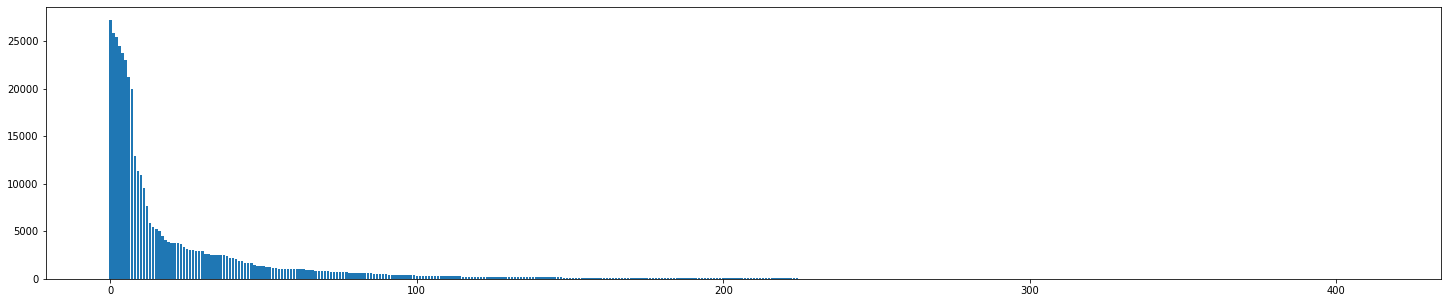

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 5))
plt.bar(range(len(subjects_count)), list(subjects_count.values()), align='center')
# plt.xticks(range(len(subjects_count)), list(subjects_count.keys()))

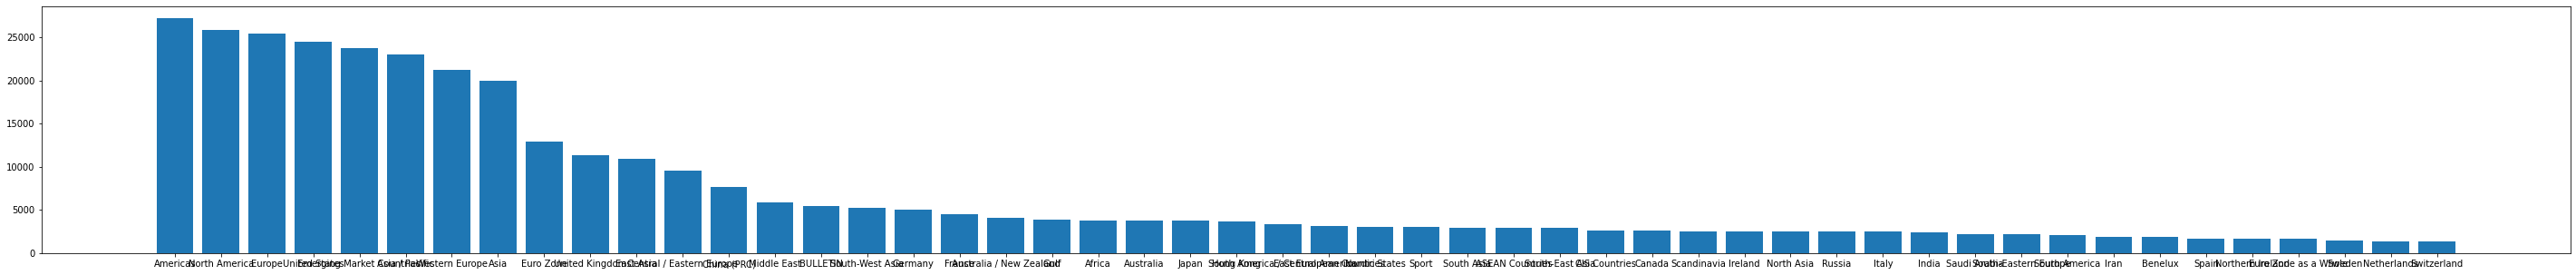

dict_keys(['Americas', 'North America', 'Europe', 'United States', 'Emerging Market Countries', 'Asia / Pacific', 'Western Europe', 'Asia', 'Euro Zone', 'United Kingdom', 'East Asia', 'Central / Eastern Europe', 'China (PRC)', 'Middle East', 'BULLETIN', 'South-West Asia', 'Germany', 'France', 'Australia / New Zealand', 'Gulf', 'Africa', 'Australia', 'Japan', 'Hong Kong', 'South America / Central America', 'East European Countries', 'Nordic States', 'Sport', 'South Asia', 'ASEAN Countries', 'South-East Asia', 'CIS Countries', 'Canada', 'Scandinavia', 'Ireland', 'North Asia', 'Russia', 'Italy', 'India', 'Saudi Arabia', 'South-Eastern Europe', 'South America', 'Iran', 'Benelux', 'Spain', 'Northern Ireland', 'Euro Zone as a Whole', 'Sweden', 'Netherlands', 'Switzerland'])

In [234]:
top_50_subjects_count = dict(filter(lambda x: x[1] >= 1331, subjects_count.items()))

plt.figure(figsize=(50, 5))
plt.bar(range(len(top_50_subjects_count)), list(top_50_subjects_count.values()), align='center')
plt.xticks(range(len(top_50_subjects_count)), list(top_50_subjects_count.keys()))
plt.show()

top_50_subjects_count.keys()

In [235]:
all_genres = set()
genre_set_list = []
for genre_set in df['genres'].to_numpy():
    if isinstance(genre_set, str) and genre_set != 'EXCEPTION':
        item_genres = eval(genre_set)
        all_genres = all_genres.union(item_genres)
        genre_set_list.append(item_genres)
    else:
        genre_set_list.append(set())
all_genres

{'"Results, Listings and Statistics (Sports)"',
 'Advisories',
 'Analyses/Viewpoints',
 'China Exclusive News',
 'Columns',
 'Context',
 'Dealtalk',
 'Diaries',
 'Editorial Specials',
 'Enterprise reporting',
 'Factbox',
 'Features',
 'Highlight',
 'Indicates that the story contains video content',
 'Insights',
 'Instant Views',
 'Interviews',
 'Market Reports',
 'Media type Audio',
 'Media type Graphics',
 'Media type PDF',
 'Media type Pictures',
 'Media type Video',
 'News Releases',
 'Newsmaker',
 'Obituaries',
 'Olympics-Events Timetables',
 'Polls',
 'Press Digests',
 'Previews',
 'Reports',
 'Reuters Breakingviews',
 'Reuters Breakingviews Full',
 'Reuters Poll',
 'Reuters Top News',
 'Schedule',
 'Special Reports',
 'Take a look',
 'Technical Analyses',
 'Texts',
 'Timeline',
 'Wrapup'}

In [236]:
print("Total number of subjects:", len(all_genres))
df['genres'] = genre_set_list
df.head()

Total number of subjects: 42


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength,subject Jordan,subject Colorado,subject Czech Republic,subject Moldova,subject Indonesia,subject Delaware,subject Greece,subject Doping / Drugs Tests,subject Cycling,subject Books,subject Bulgaria,subject East Coast (PADD I),subject Panama,subject New Zealand,subject Chad,subject Australia / New Zealand,subject Puerto Rico,subject Montenegro,subject Singapore,subject Euro Zone,subject Mississippi,subject Guadeloupe,subject Nauru,subject Montana,subject Norway,subject Myanmar,subject Afghanistan,subject Mexico,subject Venezuela,subject Monaco,subject South America,subject Egypt,subject Maryland,subject Idaho,subject Virginia,subject Badminton,subject Music,subject Uzbekistan,subject NHL Ice Hockey,subject Congo (DRC),subject South-Eastern Europe,subject Australia,subject Martial Arts,subject Angola,subject Turks and Caicos Islands,subject Anguilla,subject Micronesia,subject Energy Region Middle East,subject Guam,subject British Virgin Islands,subject Aruba,subject Cricket,subject Tunisia,subject Kuwait,subject Middle East,subject Malaysia,"subject Saint Helena, Ascension and Tristan da Cunha",subject Pakistan,subject Georgia (Country),subject Swimming,subject Kansas,subject Japan,subject NBA Basketball,subject Central African Republic,subject Table Tennis,subject India,subject Caribbean,subject Slovakia,subject Southern France,subject San Marino,subject Bahrain,subject Tuvalu,subject France,subject Nordic Skiing,subject Faroe Islands,subject Wyoming,subject United States,subject Niger,subject Ice Hockey,subject Asia,subject Pacific Islands,subject Georgia (US State),subject Triathlon,subject Art,subject Andorra,subject South-West Asia,subject Azerbaijan,subject Baltic States,subject Bowls,subject Vatican City,subject Weightlifting,subject Marathon,subject Western Europe,subject Bangladesh,subject Rugby League,subject South Africa,subject Algeria,subject Boxing,subject Snooker,subject Tajikistan,subject Wrestling,subject South Asia,subject Kosovo,subject Malta,subject Africa,subject Slovenia,subject Lithuania,subject Isle of Man,subject Costa Rica,subject New Mexico,subject Midwest (PADD II),subject Utah,subject Uruguay,subject Eritrea,subject England,subject Mauritania,subject Motorcycle Racing,subject Energy Region South America,subject Seychelles,subject Texas,subject Sweden,subject Austria,subject Kenya,subject Power Boating,subject East Asia,subject Vietnam,subject Alaska,subject Oklahoma,subject Honduras,subject Thailand,subject Suriname,subject Turkey,subject Romania,subject Missouri,subject China (PRC),subject South Korea,subject Australian Rules Football,subject North Macedonia,subject Fencing,subject Sudan,subject Senegal,subject West Indies,subject Dominican Republic,subject Asia / Pacific,subject Zimbabwe,subject Syria,subject South America / Central America,subject Taiwan,subject Karate,subject Trinidad and Tobago,subject Israel,subject Energy Region Americas,subject Saint Kitts and Nevis,subject Bobsleigh,subject South Carolina,subject Illinois,subject Congo (RC),subject Serbia,subject Saint Lucia,subject Gabon,subject Albania,subject Bermuda,subject Massachusetts,subject North Africa,subject Lebanon,subject Sao Tome and Principe,subject Gibraltar,subject Benelux,subject ASEAN Countries,subject Energy Region North Asia,subject Bahamas,subject South China Sea,subject Madagascar,subject Guernsey,subject Nigeria,subject North Asia,subject Saudi Arabia,subject Uganda,subject Angling,subject Russia,subject Finland,subject Denmark,subject Aquatic Sports,subject Morocco,subject Iraq,subject Horse Racing,subject Liechtenstein,subject Energy Region Former Soviet Union,subject Zambia,subject Hawaii,subject Djibouti,subject Tennessee,subject Laos,subject Energy Region South-East Asia,subject Tennis,subject American Samoa,subject Netherlands,subject Cambodia,subject Cayman Islands,sub

In [240]:
# build a dictionary with a key/value entry for each genre, where value is a list of True/False
# based on whether each row's genre set contains the genre
genres_dict = {}
# for index, row in df.iterrows():
for row in df.itertuples():
    for genre in all_genres:
        match = genre in row.genres
        if genre in genres_dict:
            genres_dict[genre].append(match)
        else:
            genres_dict[genre] = [match]

In [242]:
for genre in all_genres:
    df['genre ' + genre] = genres_dict[genre]

In [258]:
# https://www.reuters.com/breakingviews
cols = ['filename', 'datetime',  'guid',  'slugline',  'headline',  'description', 'genres', 'subjects', 'bodyLengthChars', 'bodyLengthCharsNonWhitespace', 'bodyLengthWords']
df_breaking_views = df[df['genre Reuters Breakingviews']][cols]

df_breaking_views.to_csv("breakingviews.csv", 
                         index=False)

In [271]:
bv_subs = set()
for sub in df_breaking_views['subjects'].to_numpy():
    bv_subs = bv_subs.union(sub)
len(bv_subs)

{'ASEAN Countries',
 'Africa',
 'Americas',
 'Argentina',
 'Arts / Culture / Entertainment',
 'Asia',
 'Asia / Pacific',
 'Australia',
 'Australia / New Zealand',
 'Austria',
 'Belgium',
 'Benelux',
 'Boating / Sailing',
 'Books',
 'Brazil',
 'CIS Countries',
 'California',
 'Canada',
 'Central / Eastern Europe',
 'Central Africa',
 'Central Asia',
 'Channel Islands',
 'China (PRC)',
 'Congo (RC)',
 'Denmark',
 'East Africa',
 'East Asia',
 'East European Countries',
 'Emerging Market Countries',
 'Energy Region Europe / Middle East / Africa',
 'Euro Zone',
 'Europe',
 'Film',
 'Finland',
 'France',
 'Georgia (Country)',
 'Germany',
 'Guernsey',
 'Gulf',
 'Hong Kong',
 'Human Interest / Brights / Odd News',
 'India',
 'Indo-China',
 'Indonesia',
 'Ireland',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Living / Lifestyle',
 'Luxembourg',
 'Malaysia',
 'Middle East',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Nordic States',
 'North America',
 'North Asia',
 'Norway',
 'Poland',
 'Russia',
 '

In [269]:
bv_genres = set()
for genre in df_breaking_views['genres'].to_numpy():
    bv_genres = bv_genres.union(genre)
bv_genres
# df_breaking_views['genres'].to_numpy()

{'Columns',
 'Dealtalk',
 'Enterprise reporting',
 'Media type Graphics',
 'Reports',
 'Reuters Breakingviews',
 'Reuters Breakingviews Full'}